<a href="https://colab.research.google.com/github/Suchitra-V31/Natural_Language_processing/blob/main/Resume_Screening_Using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Resume Screening Using NLP

In this section, We will go through a Machine Learning project on Resume Screening with Python programming language.

**Let us import all the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('/content/UpdatedResumeDataSet.csv',encoding='utf-8')

In [3]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [25]:
data['CleanResume']=''

In [26]:
data.head()

,Category,Resume,CleanResume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


Now let’s have a quick look at the categories of resumes present in the dataset

In [6]:
print("Unique Categories found in the Resume are : ")
data['Category'].unique()

Unique Categories found in the Resume are : 


array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [7]:
print("Different Categories of Resume and no of records belonging to that Category are :")
data['Category'].value_counts()

Different Categories of Resume and no of records belonging to that Category are :


Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

Now let’s visualize the number of categories in the dataset:

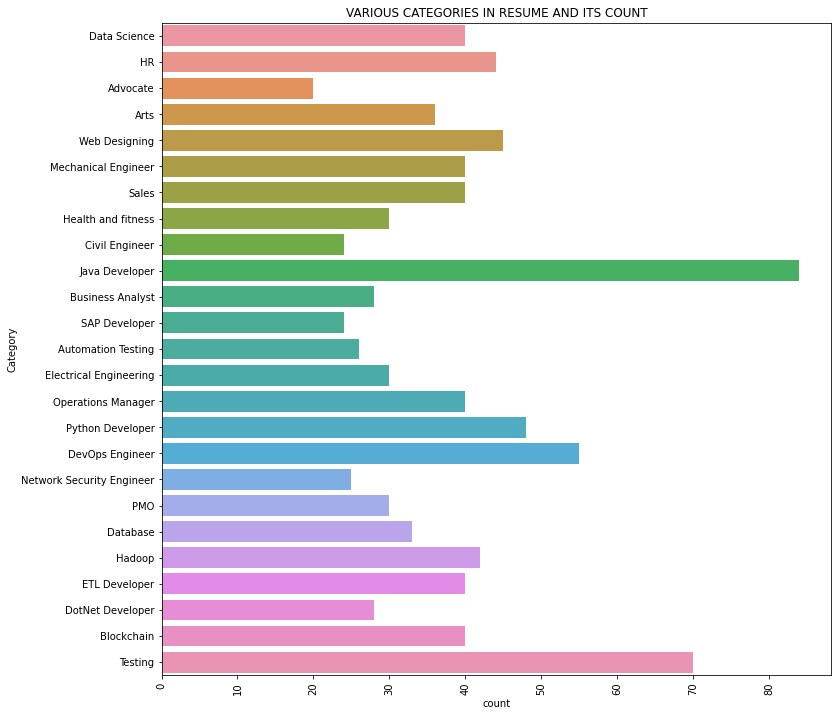

In [14]:
plt.figure(figsize=(12,12))
plt.xticks(rotation=90)
plt.title("VARIOUS CATEGORIES IN RESUME AND ITS COUNT")
sns.countplot(y=data['Category'])

([<matplotlib.patches.Wedge at 0x7f8a454c6590>,
 [Text(1.058871228953308, 0.29797939609125923, 'Data Science'),
  Text(0.7841417468169057, 0.7714413269322118, 'HR'),
  Text(0.4134731563409379, 1.0193330903024107, 'Advocate'),
  Text(0.053862331076050214, 1.098680503736666, 'Arts'),
  Text(-0.2771758554020645, 1.0645062447830609, 'Web Designing'),
  Text(-0.5706079161115722, 0.9404289479119671, 'Mechanical Engineer'),
  Text(-0.8089120262381768, 0.7454269473310228, 'Sales'),
  Text(-0.9773196261993998, 0.5048230860860717, 'Health and fitness'),
  Text(-1.0745482070561094, 0.23525762625789806, 'Civil Engineer'),
  Text(-1.0988505454600117, -0.05027403646252011, 'Java Developer'),
  Text(-1.0485773173407904, -0.3323937567981556, 'Business Analyst'),
  Text(-0.9271404102234844, -0.5919549473825093, 'SAP Developer'),
  Text(-0.7427813690411197, -0.811341998053472, 'Automation Testing'),
  Text(-0.5207132389301881, -0.9689467079271352, 'Electrical Engineering'),
  Text(-0.291057286964679, -1

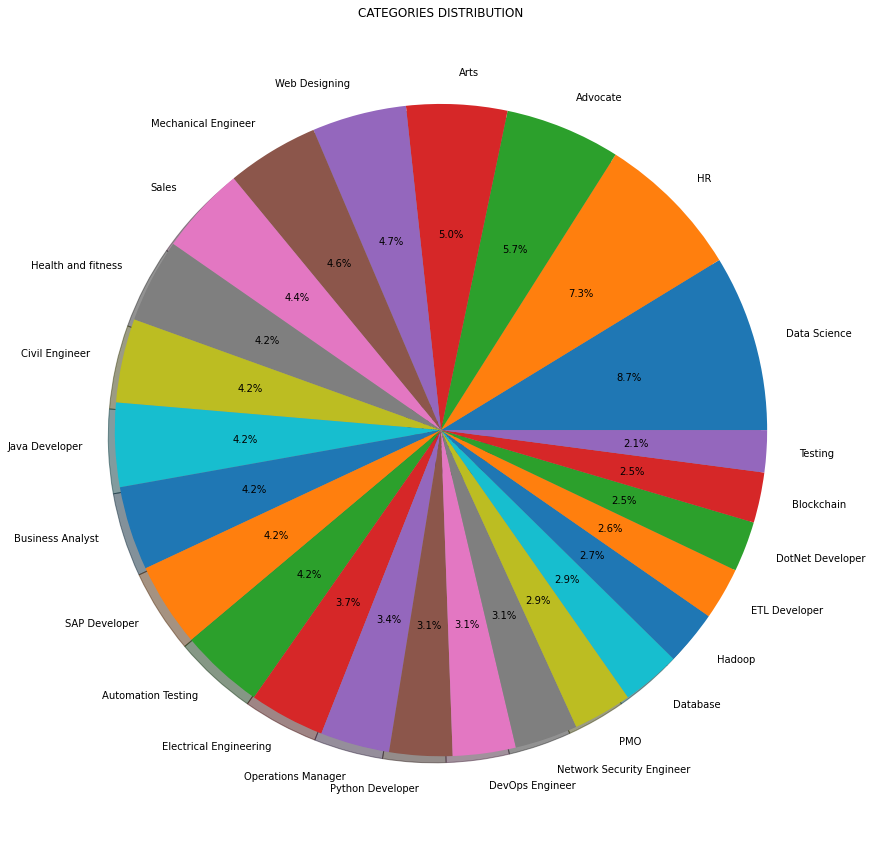

In [24]:

plt.figure(1, figsize=(15,15))
plt.title("CATEGORIES DISTRIBUTION")
targetCount=data['Category'].value_counts()
targetlabel=data['Category'].unique()
plt.pie(targetCount,labels=targetlabel,shadow=True,autopct='%1.1f%%')

Now let us create a helper function to remove the URLs, hashtags, mentions, special letters, and punctuations:

In [27]:
import re
def clean_resume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText 
data['CleanResume']=data.Resume.apply(lambda x: clean_resume(x))

In [28]:
data.head()

,Category,Resume,CleanResume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


Now as we have cleared the dataset, the next task is to have a look at the Wordcloud. A Wordcloud represents the most numbers of words larger and vice versa

In [37]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [38]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
total_words=[] 
sentences=data['Resume'].values
cleaned_sentences=''
for i in range(0,160):
  cleaned_txt=clean_resume(sentences[i])
  cleaned_sentences+=cleaned_txt 
  required_words=nltk.word_tokenize(cleaned_txt)
  for word in required_words :
    if word not in oneSetOfStopWords and word not in string.punctuation:
      total_words.append(word)



A frequency distribution for the outcomes of an experiment. For example, a frequency distribution could be used to record the frequency of each word type in a document. ...

In [39]:
wordfreqdist = nltk.FreqDist(total_words)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)


[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


In [41]:
wordcloud=WordCloud(max_font_size=40,max_words=100,background_color='black').generate(cleaned_sentences)

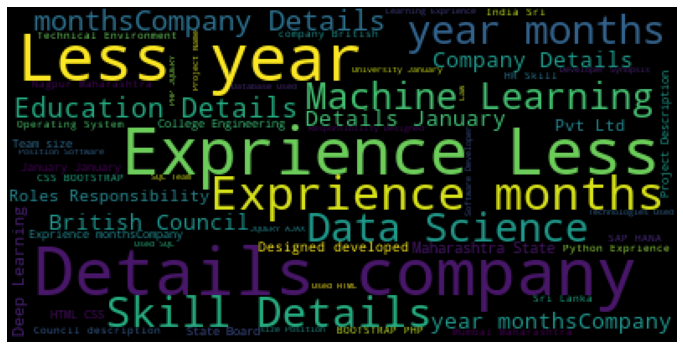

In [43]:
plt.figure(figsize=(12,12),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Now let us convert these words into categorical values

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
label_encode=LabelEncoder()
var_code=['Category']
for i in var_code:
  data[i]=label_encode.fit_transform(data[i])

In [47]:
data.head()

,Category,Resume,CleanResume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


Now the next step in the process is to train a model for the task of Resume Screening. Here we will use the one vs the rest classifier; KNeighborsClassifier. For this task, we will first split the data into training and test sets

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
x=data["CleanResume"].values
y=data['Category'].values

In [52]:
word_vect=TfidfVectorizer(sublinear_tf=True,
    stop_words='english',
    max_features=150)
X=word_vect.fit_transform(x)

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.1)

In [70]:
print(X_train.shape,X_test.shape)

(865, 150) (97, 150)


Now let’s train the model and print the classification report

In [56]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [71]:
model=OneVsRestClassifier(KNeighborsClassifier())

In [72]:
model.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [73]:
prediction=model.predict(X_test)

In [74]:
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (model, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.98

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         4
           8       1.00      0.89      0.94         9
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         3
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Thus our model has predicted with 99% accuracy**